# Specify each path

In [598]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [599]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [600]:
NUM_CLASSES = 26

# Dataset reading

In [601]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [602]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [603]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [604]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [605]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_54 (Dropout)            │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 26)             │           286 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,356 (5.30 KB)

 Trainable params: 1,356 (5.30 KB)

 Non-trainable params: 0 (0.00 B)

In [606]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    "model/keypoint_classifier/keypoint_classifier.keras",  # Update to .keras
    verbose=1,
    save_weights_only=False
)

# Early stopping callback
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)


In [607]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [608]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
159/188 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.0557 - loss: 3.2533
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0606 - loss: 3.2414 - val_accuracy: 0.1944 - val_loss: 2.8722
Epoch 2/1000
170/188 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.1574 - loss: 2.8523
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.1596 - loss: 2.8396 - val_accuracy: 0.4206 - val_loss: 2.2356
Epoch 3/1000
186/188 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.2478 - loss: 2.3920
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2480 - loss: 2.3907 - val_accuracy: 0.5860 - val_loss: 1.7498
Epoch 4/1000
183/188 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.3049 - loss: 2.1461
Epoch 4: saving model to model/keypoint_classifier/keypo

In [609]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.8519 - loss: 0.5634


In [610]:
# Loading the saved model
model = tf.keras.models.load_model("model/keypoint_classifier/keypoint_classifier.keras")

In [611]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[1.6632607e-02 1.7153833e-06 9.4392387e-09 1.9099802e-21 5.9840642e-07
 1.1551246e-07 5.4957963e-09 2.6654052e-06 5.9942255e-07 8.7680000e-01
 3.6654255e-21 4.8212599e-19 9.7596363e-14 1.8829989e-10 9.6054934e-02
 2.8590458e-07 4.2953294e-11 2.0522686e-22 1.0014130e-02 2.7042479e-05
 2.3505783e-22 1.4596651e-27 6.2209135e-14 3.0275935e-19 4.6528710e-04
 8.8978839e-14]
9


In [612]:
!pip install pandas
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Confusion matrix

251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step


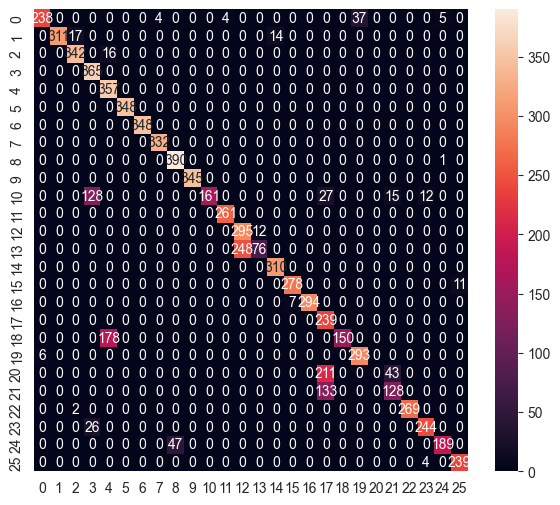

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.83      0.89       288
           1       1.00      0.91      0.95       342
           2       0.95      0.96      0.95       358
           3       0.70      1.00      0.83       365
           4       0.65      1.00      0.79       357
           5       1.00      1.00      1.00       348
           6       1.00      1.00      1.00       348
           7       0.99      1.00      0.99       332
           8       0.89      1.00      0.94       391
           9       1.00      1.00      1.00       345
          10       1.00      0.47      0.64       343
          11       0.98      1.00      0.99       261
          12       0.54      0.96      0.69       307
          13       0.86      0.23      0.37       324
          14       0.96      1.00      0.98       310
          15       0.98      0.96      0.97       289
          16       1.00      0.98      0.99       301
     

C:\Users\Jehan Colao\PycharmProjects\training01-asl\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jehan Colao\PycharmProjects\training01-asl\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jehan Colao\PycharmProjects\training01-asl\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [613]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [614]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [615]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\JEHANC~1\AppData\Local\Temp\tmpp23jrr95\assets


INFO:tensorflow:Assets written to: C:\Users\JEHANC~1\AppData\Local\Temp\tmpp23jrr95\assets


Saved artifact at 'C:\Users\JEHANC~1\AppData\Local\Temp\tmpp23jrr95'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_27')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  2624689106064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2626426279248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2624351685712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2624374763792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2624374761104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2624374753232: TensorSpec(shape=(), dtype=tf.resource, name=None)


7540

# Inference test

In [616]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [617]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [618]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [619]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [620]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.6632613e-02 1.7153830e-06 9.4392547e-09 1.9099798e-21 5.9840585e-07
 1.1551266e-07 5.4957954e-09 2.6654152e-06 5.9942306e-07 8.7679994e-01
 3.6653968e-21 4.8212589e-19 9.7596349e-14 1.8829986e-10 9.6054912e-02
 2.8590455e-07 4.2953453e-11 2.0522605e-22 1.0014120e-02 2.7042477e-05
 2.3505781e-22 1.4596646e-27 6.2209244e-14 3.0275927e-19 4.6528821e-04
 8.8978995e-14]
9
